In [8]:
import os
os.chdir(os.path.abspath('..'))

from models.UNet import *
from config import (
    NUM_CLASSES,
    IMAGE_HEIGHT,
    IMAGE_WIDTH,
    TRAIN_IMG_DIR,
    TRAIN_MASK_DIR,
    DEVICE
)
from scripts.utils import *
from data.dataset import ClothingCoParsingDataset
import albumentations as A
from albumentations.pytorch import ToTensorV2

# Loading the model

In [9]:
model = UNet(in_channels=3, out_channels=NUM_CLASSES)
load_checkpoint(torch.load("my_checkpoint.pth.tar"), model)

FileNotFoundError: [Errno 2] No such file or directory: 'my_checkpoint.pth.tar'

# Loading and preparing the images

In [ ]:
transform = A.Compose(
        [
            A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),
            A.Normalize(
                mean=[0.0, 0.0, 0.0],
                std=[1.0, 1.0, 1.0],
                max_pixel_value=255.0,
            ),
            ToTensorV2(),
        ],
    )

dataset = ClothingCoParsingDataset(
    image_dir=TRAIN_IMG_DIR,
    mask_dir=TRAIN_MASK_DIR,
    num_classes=NUM_CLASSES,
    transform=transform
)
print(dataset)

image, one_hot_mask = dataset[2]
one_hot_mask = torch.from_numpy(one_hot_mask).float()  # Convert mask to tensor
print(image.shape)
print(one_hot_mask.shape)

image = image.unsqueeze(0)
one_hot_mask = one_hot_mask.unsqueeze(0)
print(image.shape)
print(one_hot_mask.shape)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data/train/images/'

torch.Size([1, 3, 384, 256])
torch.Size([1, 384, 256])


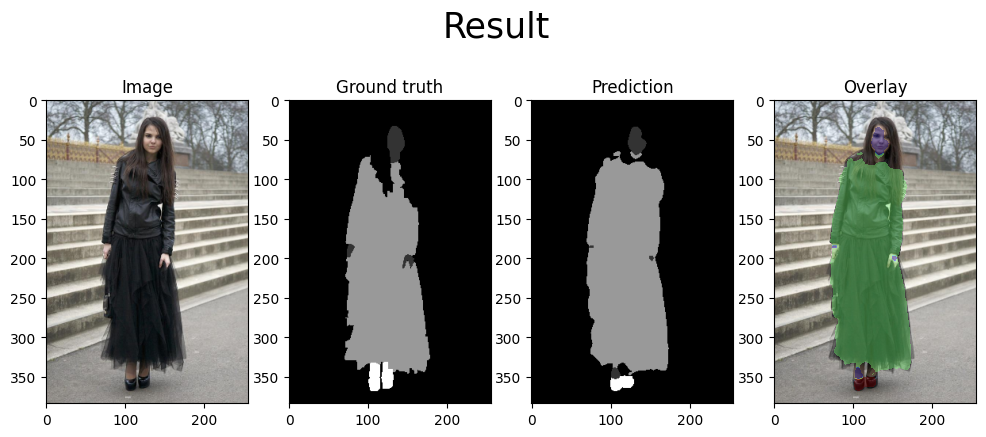

In [ ]:
show_result(model, image, one_hot_mask, title='Result', save_file=True, save_file_name='result.png', device=DEVICE)